# Ejercicio 1 Conclusiones a partir de un resumen numérico
Abajo se muestran indicadores que caracterizan la distribución de notas de dos clases paralelas
de un curso de Inglés. El puntaje máximo es 100

<br>

| Class | Mean | Median | Standard Deviation |
|-------|------|--------|--------------------|
| 1     | 78   | 65     | 16                 |
| 2     | 72   | 73     | 6                  |


## 1.1 Bosquejar el histograma (o la densidad) de la distribución de notas de cada clase

Como no es posible determinar la distribución de las notas con esta información, se generan datos de prueba que cumplan con las condiciones dadas.

In [8]:
import numpy as np

# Clase 1: partimos de la media (65) y fuimos agregando datos en ambos "lados" (mayor y menor a 65). Jugando con los datos se puede ver que la distribución similar a binomial
class_1_data = [65]
np.random.seed(1)
class_1_data = np.append(class_1_data, np.random.normal(62, 1, 5000).astype(int))
class_1_data = np.append(class_1_data, np.random.normal(94, 1, 5000).astype(int))
class_1_mean = np.mean(class_1_data)
class_1_median = np.median(class_1_data)
class_1_std = np.std(class_1_data)

# Clase 2: en este cado como la media y mediana parece en estar cerca y la desviación estándar es baja, podemos jugar a crear una distribucion normal
np.random.seed(1)
class_2_data = np.random.normal(72, 6, 10000).astype(int)
class_2_mean = np.mean(class_2_data)
class_2_median = np.median(class_2_data)
class_2_std = np.std(class_2_data)


print(f"Clase 1: {class_1_data}")
print(f"mean: {class_1_mean}")
print(f"median: {class_1_median}")
print(f"std: {class_1_std}")

print(f"Clase 2: {class_2_data}")
print(f"mean: {class_2_mean}")
print(f"median: {class_2_median}")
print(f"std: {class_2_std}")


Clase 1: [65 63 61 ... 92 93 92]
mean: 77.5062493750625
median: 65.0
std: 16.02020353332881
Clase 2: [81 68 68 ... 65 71 63]
mean: 71.5586
median: 72.0
std: 5.994077580412186


> Podemos apreciar que no se llega exactamente a los valores de la tabla, pero se acercan bastante.

Vamos a realizar un histograma para cada clase

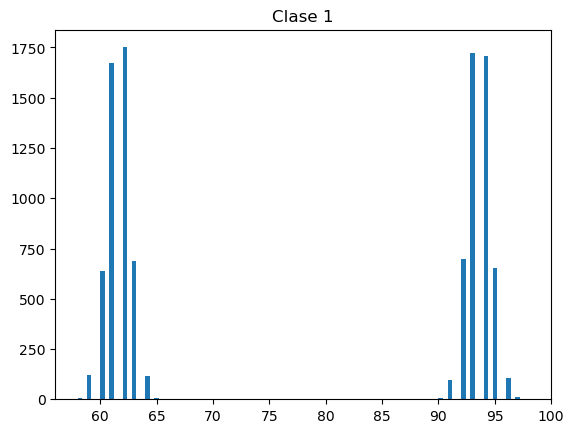

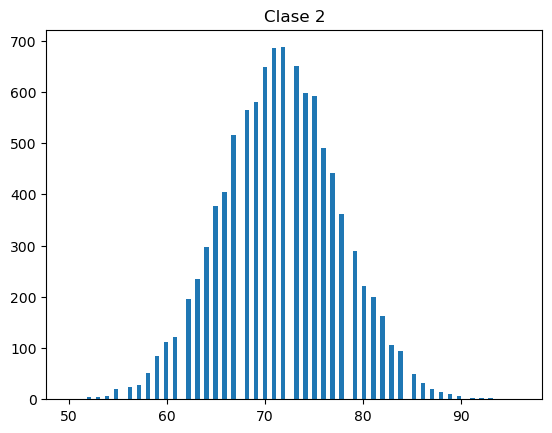

In [9]:
import matplotlib.pyplot as plt
#  histograma de la clase 1
plt.hist(class_1_data, bins=100)
plt.title("Clase 1")
plt.show()

#  histograma de la clase 2
plt.hist(class_2_data, bins=100)
plt.title("Clase 2")
plt.show()

 > Esta no es la única combinación de datos que se puede dar para generar estos histogramas.

In [10]:
## 1.2 ¿En cuál de las dos clases es más probable encontrar un estudiante con nota alta?

Depende como definamos "alta". Si tomamos como alta una nota mayor a 90, la clase 1 tiene más probabilidades de tener un estudiante con una nota alta, ya que cerca de la mitad de los estudiantes tienen esta nota.
Si tomamos como alta una nota mayor a 70, la clase 2 tiene más probabilidades de tener un estudiante con una nota alta ya que más de un 50% de los estudiantes tienen esta nota.

In [22]:
# contamos la cantidad de notas mayores a 90 en la clase 1 y clase 2
class_1_total = np.count_nonzero(class_1_data)
class_2_total = np.count_nonzero(class_2_data)
class_1_high = np.count_nonzero(class_1_data > 90)
class_2_high = np.count_nonzero(class_2_data > 90)
print(f"Clase 1 (90pts): {round(class_1_high/class_1_total,2)}%, Clase 2 (>90pts): {round(class_2_high/class_2_total,3)}%")


Clase 1 (90pts): 0.5%, Clase 2 (>90pts): 0.001%


In [23]:
# contamos la cantidad de notas mayores a 70 en la clase 1 y clase 2
class_1_high = np.count_nonzero(class_1_data > 70)
class_2_high = np.count_nonzero(class_2_data > 70)
print(f"Clase 1 (>70pts): {round(class_1_high/class_1_total,2)}%, Clase 2 (>70pts): {round(class_2_high/class_2_total,2)}%")

Clase 1 (>70pts): 0.5%, Clase 2 (>70pts): 0.57%


# 2 Estimación por máxima verosimilitud
Se tiene un muestreo aleatorio de una variable X discreta con recorrido {0, 1, 2, 3}. Supongamos
que la distribución de X depende de un parámetro θ que solo puede tomar los valores θ = 0 y
θ = 1. La función de probabilidad puntual es:

<br>

| X / θ | θ = 0 | θ = 1 |
|-------|-------|-------|
| X = 0 | 0.1   | 0.2   |
| X = 1 | 0.3   | 0.4   |
| X = 2 | 0.3   | 0.4   |
| X = 3 | 0.3   | 0.1   |

Si se tiene la muestra 0,3,1,2,0,3, hallar el estimador de máxima verosimilitud de θ.



Para eso vamos a calcular la funcion de verosimilitud para cada valor de theta y luego vamos a ver cual es el que maximiza la funcion de verosimilitud.

$$L(\theta) = p(X=0, \theta) \cdot p(X=3, \theta) \cdot p(X=1, \theta) \cdot p(X=2, \theta) \cdot p(X=0, \theta) \cdot p(X=3, \theta)$$

Para $\theta = 0$:
$$L(\theta = 0) = 0.1 \cdot 0.3 \cdot 0.3 \cdot 0.3 \cdot 0.1 \cdot 0.3 = 0.000081$$

Para $\theta = 1$:
$$L(\theta = 1) = 0.2 \cdot 0.1 \cdot 0.4 \cdot 0.4 \cdot 0.2 \cdot 0.1 = 0.000064$$

Si comparamos podemos ver que $L(\theta = 0) > L(\theta = 1)$, por lo tanto el estimador de máxima verosimilitud de $\theta$ es 0.

# 3 Conceptos, riesgo empírico y riesgo verdadero
![image.png](./ej_3.png)

## 3.1 Utilizando la 0-1 loss, ¿cuál es el riesgo empírico de la hipótesis h?

$$
L_S(h) = \frac{1}{|S|} \sum_{(x, y) \in S} L(h(x), y)
$$

![image.png](./riesgo_empirico.png)

Por lo que podemos ver en la imagen la hipotesis $h$ pudo predecir todos los blancos, y se equivoco en dos rojos.

Dado que $|S| = 20$, entonces $L_S(h) = \frac{2}{20} = 0.1$

## 3.2 ¿Cuál es el riesgo verdadero de la hipótesis h?

$$
L_{D,c}(h) = E_x[L(h(x), c(x))]
$$

![image.png](./riesgo_verdadero.png)

Por lo que podemos ver la diferencia entre la hipotesis y el concepto real es que la hipotesis predice 8 como rojos cuando no lo son, y predice 16 como blancos cuando no lo son.

Dado que $|D| = 100$, entonces $L_{D,c}(h) = \frac{24}{100} = 0.24$